In [1]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('Dataset.xlsx')
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
9330,1.5,14,Clay,55
9331,3.0,21,Clay,60
9332,4.5,22,Clay,160
9333,6.0,17,Clay,190


In [2]:
data = pd.get_dummies(data, columns=["Soil Type"], prefix=["Soil_Type"], drop_first=True, dtype=int)
data= data.drop('Soil_Type_Sand',axis=1)
# data= data.drop('SPT_N',axis=1)
data

,Depth (m),SPT_N,Vs (m/s)
0,1.5,4,70
1,3.0,5,135
2,4.5,3,175
3,6.0,2,200
4,7.5,10,290
...,...,...,...
9330,1.5,14,55
9331,3.0,21,60
9332,4.5,22,160
9333,6.0,17,190


In [3]:
data=data.drop_duplicates()

In [4]:
data = data[data['SPT_N'] < 200]

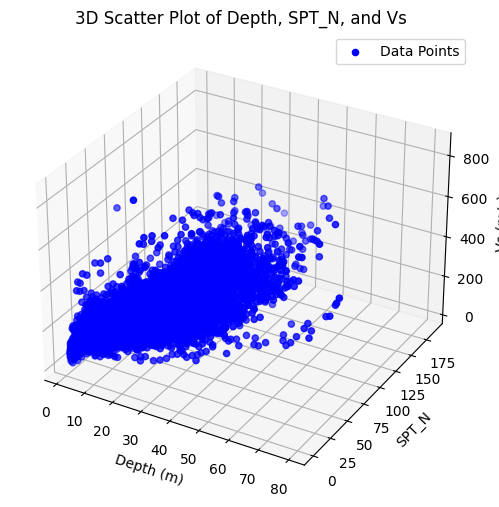

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Depth (m)'], data['SPT_N'], data['Vs (m/s)'], c='blue', marker='o', label='Data Points')

ax.set_xlabel('Depth (m)')
ax.set_ylabel('SPT_N')
ax.set_zlabel('Vs (m/s)')
ax.set_title('3D Scatter Plot of Depth, SPT_N, and Vs')

plt.legend()
plt.show()

In [7]:
data.describe()

,Depth (m),SPT_N,Vs (m/s)
count,7940.000000,7940.000000,7940.000000
mean,22.808690,32.621662,286.247733
std,12.869748,23.895613,111.938758
min,1.500000,1.000000,15.000000
25%,12.000000,15.000000,201.000000
50%,22.500000,26.000000,280.000000
75%,31.500000,44.000000,355.000000
max,79.500000,188.000000,850.000000


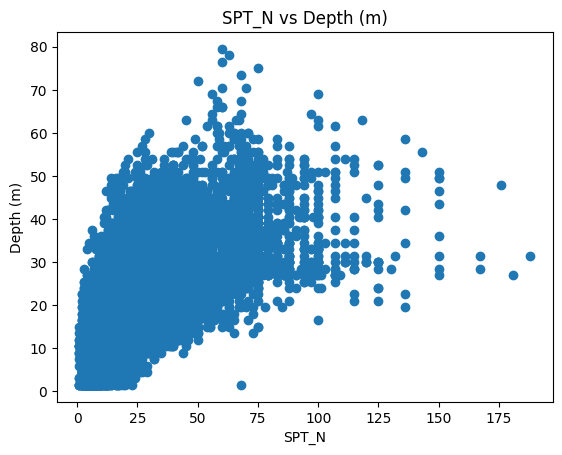

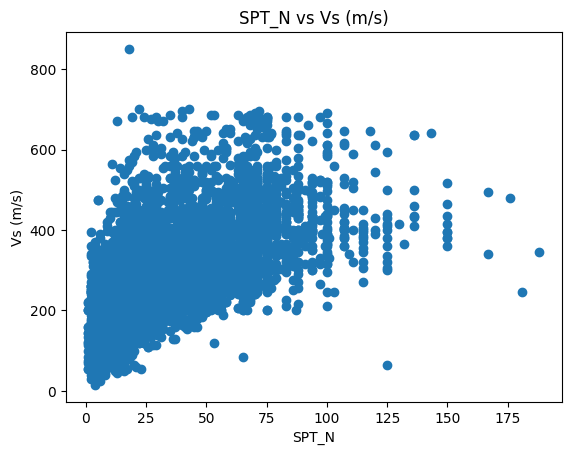

In [39]:
regression_column = 'SPT_N' #'Vs (m/s)'
y = data[regression_column]

# Plotting separate scatter plots for each column
for column in data.columns:
    if column != regression_column:
        plt.figure()  # Create a new figure for each subplot
        plt.scatter(data[regression_column], data[column])
        plt.xlabel(regression_column)
        plt.ylabel(column)
        plt.title("{} vs {}".format(regression_column, column))

# Display the plots
plt.show()

In [8]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Assuming 'data' is your DataFrame with numeric columns
# # Replace 'n_clusters' with the desired number of clusters
# n_clusters = 3

# # Extract numeric columns for clustering
# numeric_columns = data.select_dtypes(include='number')

# # Standardize the numeric columns
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(numeric_columns)

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# data['cluster'] = kmeans.fit_predict(data_scaled)

# # Calculate the mean and standard deviation for each cluster
# cluster_stats = data.groupby('cluster').agg(['mean', 'std'])

# # Identify and remove outliers based on a threshold (e.g., 3 standard deviations)
# outlier_threshold = 3
# outliers = pd.DataFrame()

# for cluster in range(n_clusters):
#     is_outlier = (data['cluster'] == cluster) & (
#         (data_scaled - cluster_stats.loc[cluster, ('mean', slice(None))]).abs().max(axis=1) > outlier_threshold * cluster_stats.loc[cluster, ('std', slice(None))].max(axis=1)
#     )

#     outliers = outliers.append(data[is_outlier])

# # Drop the outliers from the original DataFrame
# data_no_outliers = data.drop(outliers.index)

# # Drop the 'cluster' column if you no longer need it
# data_no_outliers = data_no_outliers.drop(columns='cluster')


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
data=data.sample(frac=1)
# X=data['Depth (m)'].values.reshape(-1,1) #.drop('Vs (m/s)', axis=1)
# y=data['SPT_N'].values.reshape(-1,1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# X_train = train_data[['Depth (m)']].values.reshape(-1, 1)
# y_train = train_data['SPT_N'].values.reshape(-1, 1)

In [26]:
len(train_data)

6352

In [34]:
X = train_data[['Depth (m)']].values.reshape(-1, 1) #X_train#.values.reshape(-1, 1) #[['Depth (m)']]
y = train_data['SPT_N'].values.reshape(-1, 1)  #y_train #data['Vs (m/s)']
regressor = LinearRegression()
regressor.fit(X, y)


y_pred = regressor.predict(X)


residuals = y - y_pred


mse = mean_squared_error(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")


threshold = 10


outliers = np.abs(residuals) > threshold


train_data = train_data[~outliers]
# y_train = y_train[~outliers]


Mean Squared Error (MSE): 339.1642813960526


In [35]:
train_data

,Depth (m),SPT_N,Vs (m/s)
5979,22.5,25,235
5542,15.0,25,200
1606,49.5,68,370
4666,21.0,27,220
507,4.5,2,115
...,...,...,...
685,48.0,73,630
6992,12.0,10,240
6222,4.5,13,110
2890,13.5,13,240


In [67]:
# y_pred_test = regressor.predict(X_test)


# residuals_test = y_pred_test  


# outliers_test = np.abs(residuals_test) > threshold

# X_test = X_test[~outliers_test]
# y_test = y_test[~outliers_test]

In [42]:
X_train = train_data.drop('Vs (m/s)', axis=1)
y_train = train_data['Vs (m/s)']

In [43]:
X_test = test_data.drop('Vs (m/s)', axis=1)
y_test = test_data['Vs (m/s)']

In [44]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train) #.values.reshape(-1,1)

y_pred = regressor.predict(X_test) #.values.reshape(-1,1)


mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rmse_test = sqrt(mse_test)


print(f"Regressor: {regressor.__class__.__name__}")
print("Test set results:")
print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
print(f"Mean Squared Error (MSE) on test data: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
print(f"R-squared (R2) on test data: {r2_test}")
print("\n")
    

Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 55.73305035378362
Mean Squared Error (MSE) on test data: 5992.15209839452
Root Mean Squared Error (RMSE) on test data: 77.40899236131756
R-squared (R2) on test data: 0.5161407916398917




In [50]:
data

,Depth (m),SPT_N,Vs (m/s)
1,3.0,5,135
2,4.5,3,175
3,6.0,2,200
24,3.0,2,130
38,24.0,24,345
...,...,...,...
9328,10.5,9,200
9329,12.0,11,220
9332,4.5,22,160
9333,6.0,17,190



Mean Squared Error (MSE): 1379.6457758119502


In [46]:
data= data_no_outliers

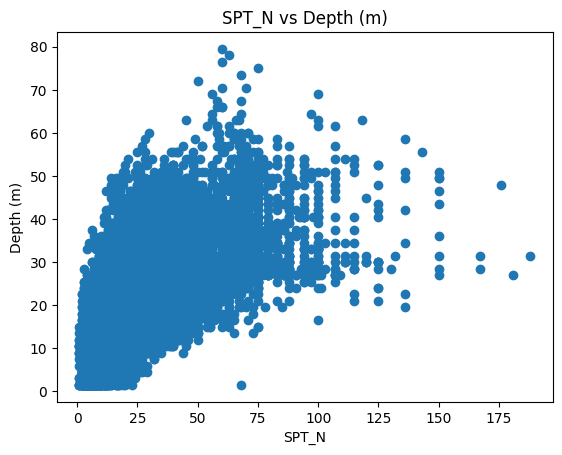

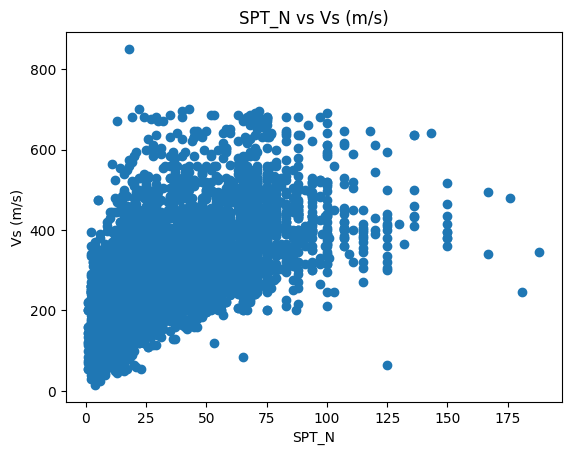

In [13]:
regression_column ='SPT_N' #'Vs (m/s)'
y = data[regression_column]

# Plotting separate scatter plots for each column
for column in data.columns:
    if column != regression_column:
        plt.figure()  # Create a new figure for each subplot
        plt.scatter(data[regression_column], data[column])
        plt.xlabel(regression_column)
        plt.ylabel(column)
        plt.title("{} vs {}".format(regression_column, column))

# Display the plots
plt.show()

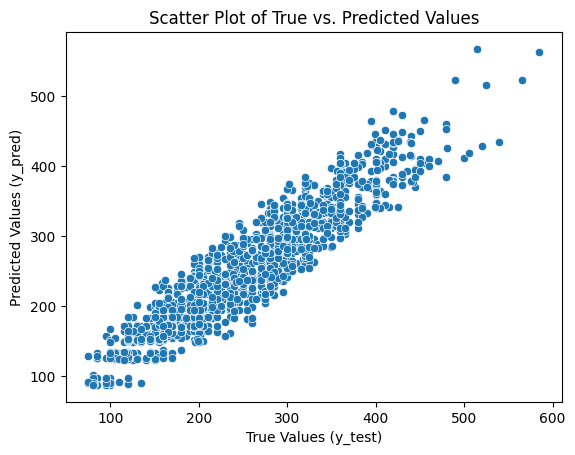

In [52]:
best_model=GradientBoostingRegressor()

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()